In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import os
import re
import datetime
import matplotlib.pyplot as plt

In [2]:
os.environ['HDF5_USE_FILE_LOCKING']='FALSE'

In [13]:
def read_data(path, filename, data):
    try:
        if filename.endswith('nc'):
            df = xr.open_dataset(path+str(filename))
            date = pd.to_datetime(df['time'].values[0])
            data['date'].append(date)
            region = df['lwe_thickness'].sel(lat=slice(30.5, 39.5), lon=slice(270.5, 279.5))
            data['lwe_thickness'].append(region.mean().values.item())
            data['uncertainty'].append(df['uncertainty'].sel(lat=slice(30.5, 39.5), lon=slice(270.5, 279.5)).mean().values.item())
        else:
            pass
    except Exception as e:
        print(e)
        print(path)
        print(filename)

In [14]:
grace_path = '/home/yhuang21/remoteData/GRACE_NEW/data/TELLUS_GRAC_L3_CSR_RL06_LND_v04/'
gracefo_path = '/home/yhuang21/remoteData/GRACEFO/'

In [15]:
data = {'date':[], 'lwe_thickness':[], 'uncertainty': []}

for filename in os.listdir(grace_path):
    read_data(grace_path, filename, data)

for filename in os.listdir(gracefo_path):
    read_data(gracefo_path, filename, data)
    

In [16]:
df = pd.DataFrame(data)
df = df.sort_values('date')
df.dtypes

date             datetime64[ns]
lwe_thickness           float64
uncertainty             float64
dtype: object

In [17]:
df

,date,lwe_thickness,uncertainty
0,2018-06-16 00:00:00,0.030726,0.014056
1,2018-07-10 00:00:00,-0.008678,0.016286
2,2018-10-31 12:00:00,0.013263,0.014956
3,2018-11-16 00:00:00,0.052035,0.012950
4,2018-12-16 12:00:00,0.106473,0.014437
5,2019-01-16 12:00:00,0.141106,0.014662
6,2019-02-15 00:00:00,0.170132,0.016216
7,2019-03-16 12:00:00,0.162415,0.014017
8,2019-04-16 00:00:00,0.134540,0.012930
9,2019-05-16 12:00:00,0.136631,0.014623


In [18]:
os.getcwd()

'/home/yhuang21/DSSG2023-Groundwater/Snippets/yuanninghuang'

NameError: name 'mdates' is not defined

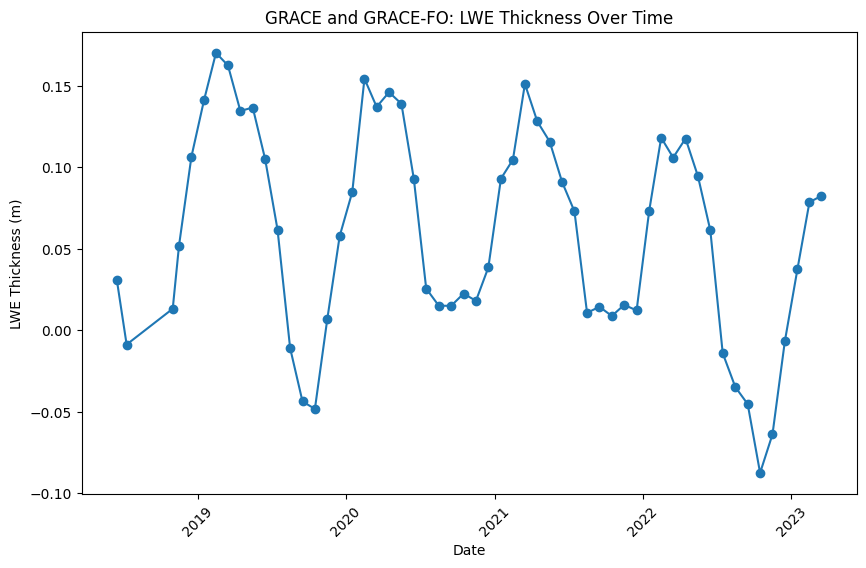

In [19]:
plt.figure(figsize=(10, 6))  # optional; specifies the size of the figure
plt.plot(df['date'], df['lwe_thickness'], marker='o')  # creates a line plot with markers at each data point

plt.xlabel('Date')
plt.ylabel('LWE Thickness (m)')
plt.title('GRACE and GRACE-FO: LWE Thickness Over Time')

plt.xticks(rotation=45)

# Set x-axis major locator to be each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Set x-axis major formatter to display only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.grid(True)  # optional; adds a grid for easier visualization
plt.show()


NameError: name 'mdates' is not defined

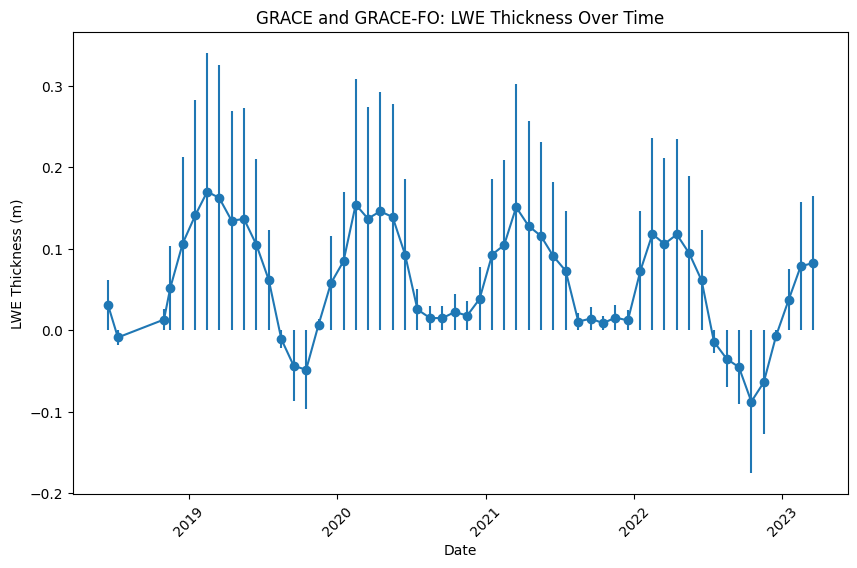

In [12]:
df['uncertainty'] = df['uncertainty'].abs()

plt.figure(figsize=(10, 6))  # optional; specifies the size of the figure
plt.errorbar(df['date'], df['lwe_thickness'], yerr=df['uncertainty'], fmt='-o')  # creates a line plot with markers and error bars at each data point

plt.xlabel('Date')
plt.ylabel('LWE Thickness (m)')
plt.title('GRACE and GRACE-FO: LWE Thickness Over Time')

plt.xticks(rotation=45)

# Set x-axis major locator to be each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Set x-axis major formatter to display only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.grid(True)  # optional; adds a grid for easier visualization
plt.show()

In [3]:
df_grace = xr.open_dataset('../../../remoteData/GRACE_NEW2/TELLUS_GRFO_L3_GFZ_RL06.1_LND_v04/GRD-3_2018152-2018181_GRFO_GFZOP_BA01_0601_LND_v04.nc')

In [3]:
df_grace = xr.open_dataset('/home/yhuang21/remoteData/GRACE_NEW/data1/TELLUS_GRAC_L3_CSR_RL06_LND_v04/GRD-3_2017143-2017179_GRAC_UTCSR_BA01_0600_LND_v04.nc')

FileNotFoundError: [Errno 2] No such file or directory: '/home/yhuang21/remoteData/GRACE_NEW/data1/TELLUS_GRAC_L3_CSR_RL06_LND_v04/GRD-3_2017143-2017179_GRAC_UTCSR_BA01_0600_LND_v04.nc'

In [147]:
df_grace

<xarray.Dataset>
Dimensions:        (lon: 360, lat: 180, time: 1, bounds: 2)
Coordinates:
  * lon            (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat            (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time           (time) datetime64[ns] 2017-06-10T12:00:00
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (time, lat, lon) float64 ...
    uncertainty    (time, lat, lon) float64 ...
    lat_bounds     (lat, bounds) float64 ...
    lon_bounds     (lon, bounds) float64 ...
    time_bounds    (time, bounds) datetime64[ns] ...
Attributes: (12/59)
    Conventions:                CF-1.6
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    title:                      GRACE-FO Water-Equivalent-Thickness Surface-M...
    id:                         TELND-3NC64
    summary:                    Gridded surface mass anomalies, derived from ...
    processing_level:           3
    ...                         ...
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  One degree grid
    geospatial_lon_min:         0.5
    geospatial_lon_max:         359.5
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  One degree grid

In [148]:
print(df_grace['lat_bounds'].values)


[[-9.00000000e+01 -8.90000000e+01]
 [-8.90000000e+01 -8.80000000e+01]
 [-8.80000000e+01 -8.70000000e+01]
 [-8.70000000e+01 -8.60000000e+01]
 [-8.60000000e+01 -8.50000000e+01]
 [-8.50000000e+01 -8.40000000e+01]
 [-8.40000000e+01 -8.30000000e+01]
 [-8.30000000e+01 -8.20000000e+01]
 [-8.20000000e+01 -8.10000000e+01]
 [-8.10000000e+01 -8.00000000e+01]
 [-8.00000000e+01 -7.90000000e+01]
 [-7.90000000e+01 -7.80000000e+01]
 [-7.80000000e+01 -7.70000000e+01]
 [-7.70000000e+01 -7.60000000e+01]
 [-7.60000000e+01 -7.50000000e+01]
 [-7.50000000e+01 -7.40000000e+01]
 [-7.40000000e+01 -7.30000000e+01]
 [-7.30000000e+01 -7.20000000e+01]
 [-7.20000000e+01 -7.10000000e+01]
 [-7.10000000e+01 -7.00000000e+01]
 [-7.00000000e+01 -6.90000000e+01]
 [-6.90000000e+01 -6.80000000e+01]
 [-6.80000000e+01 -6.70000000e+01]
 [-6.70000000e+01 -6.60000000e+01]
 [-6.60000000e+01 -6.50000000e+01]
 [-6.50000000e+01 -6.40000000e+01]
 [-6.40000000e+01 -6.30000000e+01]
 [-6.30000000e+01 -6.20000000e+01]
 [-6.20000000e+01 -6

In [149]:
print(df_grace['lat_bounds'].coords)

Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5


In [150]:
df_grace['lat_bounds'].sel(lat=-89.5).values

array([-90., -89.])

In [151]:
print(df_grace['lwe_thickness'].dims)

('time', 'lat', 'lon')


lat: 30N-40N, lon: 90W-80W (-90to-80)

lat: 30-40, lon:270-280

In [152]:
df_grace['lwe_thickness'].sel(lat=slice(30.5, 39.5), lon=slice(270.5, 279.5)).mean().values.item()

0.06678245512623972